In [46]:
import matplotlib.pyplot as plt
from statsmodels.stats.inter_rater import aggregate_raters
from statsmodels.stats.inter_rater import fleiss_kappa
import pandas as pd
import numpy as np 
batch1 = pd.read_csv("batch_1_summary/batch_1_instance.csv")
batch2 = pd.read_csv("batch_2_summary/batch_2_instance.csv")
batch3 = pd.read_csv("batch_3_summary/batch_3_instance.csv")
batch4 = pd.read_csv("batch_4_summary/batch_4_instance.csv")
metabatch = pd.read_csv("metabatch_result.csv")
batches = [batch1, batch2, batch3, batch4, metabatch]

In [47]:
NUM_ASSIGNMENTS = 3
NUMS_INSTANCES = [675, 675, 675, 678]
LABELS = ["Figurative", "Literal", "Ambiguous", "Discard"]
NUMS_INSTANCES.append(sum(NUMS_INSTANCES))

In [48]:
NUMS_INSTANCES[-1]

2703

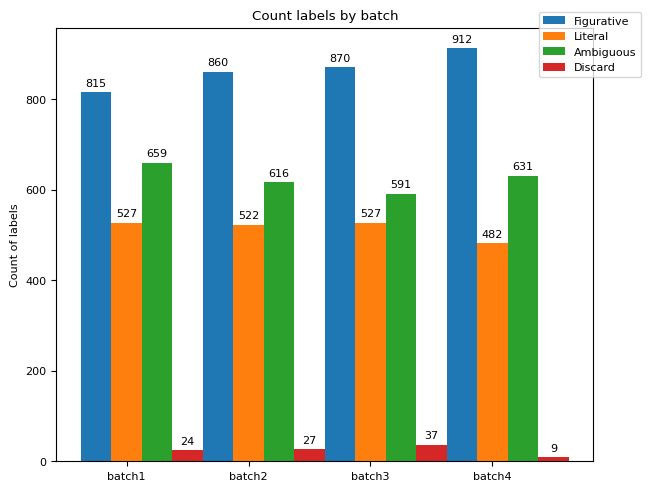

In [49]:
batch_names = ["batch1", "batch2", "batch3", "batch4"]
label_counts = {}
for i in range(len(LABELS)):
    for j in range(len(batch_names)):
        label = LABELS[i]
        if label not in label_counts:
            label_counts[label] = []
        label_counts[label].append(
            sum(aggregate_raters(batches[j][[(f'gold_{k}') for k in range(NUM_ASSIGNMENTS)]])[0].T[i])
        )

x = np.arange(len(batch_names))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in label_counts.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Count of labels')
ax.set_title('Count labels by batch')
ax.set_xticks(x + width, batch_names)
ax.legend(bbox_to_anchor=(1.1, 1.05))

plt.show()

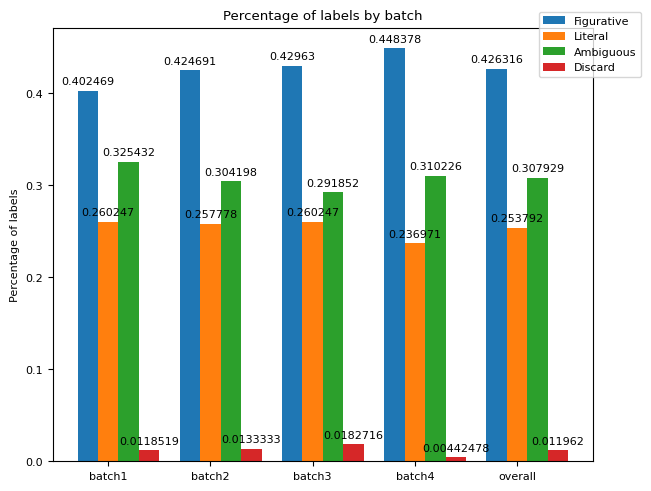

In [50]:
batch_names = ["batch1", "batch2", "batch3", "batch4", "overall"]
label_counts = {}
for i in range(len(LABELS)):
    for j in range(len(batch_names)):
        label = LABELS[i]
        if label not in label_counts:
            label_counts[label] = []
        label_counts[label].append(
            sum(aggregate_raters(
                batches[j][[(f'gold_{k}') for k in range(NUM_ASSIGNMENTS)]]
            )[0].T[i]) / (NUMS_INSTANCES[j] * 3)
        )

x = np.arange(len(batch_names))  # the label locations
width = 0.20  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in label_counts.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Percentage of labels')
ax.set_title('Percentage of labels by batch')
ax.set_xticks(x + width, batch_names)
ax.legend(bbox_to_anchor=(1.1, 1.05))

plt.show()

## Kappa Comparison

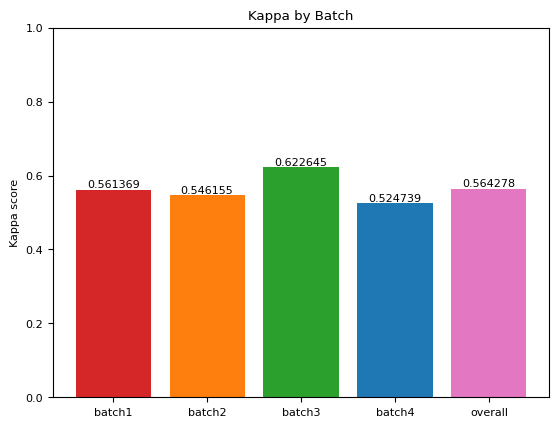

In [51]:
fig, ax = plt.subplots()

kappas = []
for batch in batches:
    gold = aggregate_raters(batch[[(f'gold_{i}') for i in range(NUM_ASSIGNMENTS)]])[0]
    kappas.append(fleiss_kappa(gold, method='fleiss'))

batch_names = ['batch1', 'batch2', 'batch3', 'batch4', 'overall']
bar_colors = ['tab:red', 'tab:orange', 'tab:green', 'tab:blue', 'tab:pink']

bars = ax.bar(batch_names, kappas, color=bar_colors)

ax.set_ylabel('Kappa score')
ax.set_title('Kappa by Batch')
ax.bar_label(bars)
plt.ylim(0, 1.0)
plt.show()

# Everything about Discards

- Percentage of discard annotations for each batch
- Percentage of discard max votes for each batch

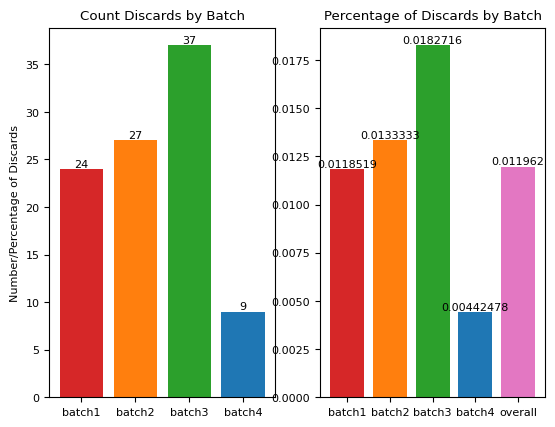

In [52]:
discard_nums = []
discard_percentages = []
for i in range(len(batches)):
    s = sum(aggregate_raters(batches[i][[(f'gold_{i}') for i in range(NUM_ASSIGNMENTS)]])[0].T[3])
    discard_nums.append(s)
    discard_percentages.append(s / (NUMS_INSTANCES[i] * 3))

batch_names = ['batch1', 'batch2', 'batch3', 'batch4', 'overall']
bar_colors = ['tab:red', 'tab:orange', 'tab:green', 'tab:blue', 'tab:pink']

plt.rcParams.update({'font.size': 8})

fig, (ax1, ax2) = plt.subplots(1, 2)
bars1 = ax1.bar(batch_names[:4], discard_nums[:4], color=bar_colors)
ax1.set_ylabel('Number/Percentage of Discards')
ax1.set_title('Count Discards by Batch')
ax1.bar_label(bars1)

bars2 = ax2.bar(batch_names, discard_percentages, color=bar_colors)
ax2.set_title('Percentage of Discards by Batch')
ax2.bar_label(bars2)
plt.show()

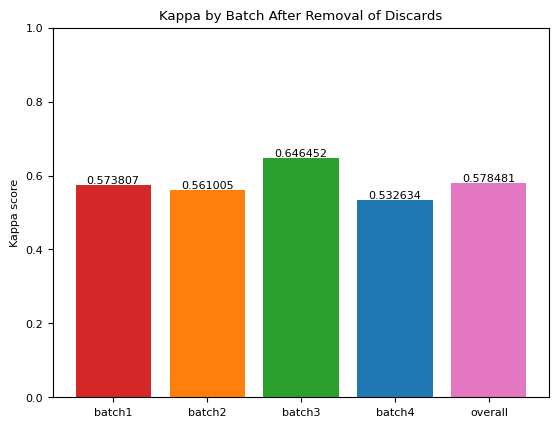

In [53]:
fig, ax = plt.subplots()
kappas = []
for batch in batches:
    batch_no_discard = batch[
        (batch['gold_0'] != 3) & (batch['gold_1'] != 3) & (batch['gold_2'] != 3)].reset_index(drop=True)
    gold = aggregate_raters(batch_no_discard[[(f'gold_{i}') for i in range(NUM_ASSIGNMENTS)]])[0]
    kappas.append(fleiss_kappa(gold, method='fleiss'))

batch_names = ['batch1', 'batch2', 'batch3', 'batch4', 'overall']
bar_colors = ['tab:red', 'tab:orange', 'tab:green', 'tab:blue', 'tab:pink']
bars = ax.bar(batch_names, kappas, color=bar_colors)

ax.set_ylabel('Kappa score')
ax.set_title('Kappa by Batch After Removal of Discards')
ax.bar_label(bars)
plt.ylim(0, 1.0)
plt.show()

### Instances that contain at least 1 discard vote

In [54]:
batch_discards = metabatch[
    (metabatch['gold_0'] == 3) | (metabatch['gold_1'] == 3) | (metabatch['gold_2'] == 3)]
def aggregate_discard_count(row):
    row['num_discard'] = 0 + \
        (1 if row['gold_0'] == 3 else 0) + \
        (1 if row['gold_1'] == 3 else 0) + \
        + (1 if row['gold_2'] == 3 else 0)
    return row
batch_discards = batch_discards.apply(aggregate_discard_count, axis=1)
batch_discards.sort_values('num_discard').to_csv('discard_instances.csv', index=False)
print(f"There are {len(batch_discards)} out of {len(metabatch)} instances that contain at least 1 discard vote")

There are 78 out of 2703 instances that contain at least 1 discard vote


In [55]:
from collections import Counter
discard_counts_per_idiom = {}
for i in range(len(metabatch)):
    row = metabatch.iloc[i]
    for j in range(NUM_ASSIGNMENTS):
        if row[f"gold_{j}"] == 3:
            if row['idiom'] not in discard_counts_per_idiom:
                discard_counts_per_idiom[row['idiom']] = 1
            else:
                discard_counts_per_idiom[row['idiom']] += 1
print(f"There are {len(discard_counts_per_idiom)} idioms that yield at least 1 discard vote. Top 5 such idioms:")
dict(Counter(discard_counts_per_idiom).most_common(5))

There are 72 idioms that yield at least 1 discard vote. Top 5 such idioms:


{'crocodile tears': 3,
 'good egg': 3,
 'new brush sweeps clean': 3,
 'over the top': 3,
 'back to the wall': 2}

In [62]:
batch_filtered = metabatch.copy()
batch_filtered[['F', 'L', 'A', 'D']] = \
    aggregate_raters(batch_filtered[[(f'gold_{i}') for i in range(NUM_ASSIGNMENTS)]])[0]
def agg(row):
    row['golds'] = [row['gold_0'], row['gold_1'], row['gold_2']]
    return row
batch_filtered = batch_filtered.apply(agg, axis=1)
batch_filtered['discard_idiom'] = batch_filtered['idiom'].apply(lambda x: x in discard_counts_per_idiom)
batch_filtered = batch_filtered[~batch_filtered['discard_idiom']].reset_index(drop=True)
batch_filtered = batch_filtered[['idiom', 'meaning', 'instance', 'label', 'maxVote', 'golds']]

In [66]:
batch_present = batch_filtered.groupby(
    batch_filtered.index // NUM_ASSIGNMENTS
).agg(lambda x: list(x)).reset_index(drop=True)

def expand(row):

    def translate(i):
        if i == 2:
            return "ambiguous"
        elif i == 1:
            return "literal"
        else:
            return "figurative"

    row['idiom'] = row['idiom'][0]
    row['meaning'] = row['meaning'][0]

    row['intended_ambiguous'] = row['instance'][2]
    row['maxvote_ambiguous'] = translate(row['maxVote'][2])
    row['annotations_ambiguous'] = list(map(translate, row['golds'][2]))

    row['intended_figurative'] = row['instance'][0]
    row['maxvote_figurative'] = translate(row['maxVote'][0])
    row['annotations_figurative'] = list(map(translate, row['golds'][0]))

    row['intended_literal'] = row['instance'][1]
    row['maxvote_literal'] = translate(row['maxVote'][1])
    row['annotations_literal'] = list(map(translate, row['golds'][1]))

    row['aligned'] = False
    row['rearranged'] = False
    if row['maxvote_ambiguous'] == 'ambiguous':
        if row['maxvote_figurative'] == 'literal' and row['maxvote_literal'] == 'figurative':
            row['aligned'] = True
            row['rearranged'] = True
        elif row['maxvote_figurative'] == 'figurative' and row['maxvote_literal'] == 'literal':
            row['aligned'] = True
    return row

batch_present = batch_present.apply(expand, axis=1)

batch_present = batch_present[
    ['idiom', 'meaning', 
     'intended_ambiguous', 'maxvote_ambiguous',
     'intended_figurative', 'maxvote_figurative',
     'intended_literal', 'maxvote_literal',
     'annotations_ambiguous', 'annotations_figurative', 'annotations_literal', 'aligned', 'rearranged']].reset_index(drop=True)
batch_present.to_csv("batch_result.csv", index=False)

In [69]:
batch_present

,idiom,meaning,intended_ambiguous,maxvote_ambiguous,intended_figurative,maxvote_figurative,intended_literal,maxvote_literal,annotations_ambiguous,annotations_figurative,annotations_literal,aligned,rearranged
0,24/7 (twenty-four-seven),constantly,We're open 24/7,figurative,We're open 24/7 to accommodate all of our cust...,figurative,We're open 24/7 so that you can shop at our st...,literal,"[ambiguous, literal, figurative]","[figurative, literal, ambiguous]","[literal, literal, literal]",False,False
1,Achilles heel,a vulnerable spot or weakness,This is his Achilles heel,ambiguous,"This is his Achilles heel, as he always has di...",figurative,"This is his Achilles heel, as he has a weak sp...",literal,"[ambiguous, ambiguous, ambiguous]","[figurative, figurative, figurative]","[literal, literal, literal]",True,False
2,Dutch uncle,"criticize, scold or lecture someone",He talked to me like a Dutch uncle,figurative,He talked to me like a Dutch uncle when he sco...,figurative,He talked to me like a Dutch uncle as he was b...,literal,"[ambiguous, figurative, figurative]","[figurative, figurative, figurative]","[literal, literal, literal]",False,False
3,Easter egg,a decorated or dyed egg usually given to child...,She found the Easter egg,ambiguous,She found the Easter egg which was the key to ...,figurative,She found the Easter egg which was the prize f...,literal,"[ambiguous, literal, ambiguous]","[figurative, figurative, ambiguous]","[literal, literal, literal]",True,False
4,"Mr Right, Ms Right",the best future life partner for someone,She is looking for Mr Right and Ms Right,figurative,She is looking for Mr Right and Ms Right to st...,figurative,She is looking for Mr Right and Ms Right which...,literal,"[figurative, literal, ambiguous]","[literal, figurative, figurative]","[ambiguous, literal, literal]",False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
824,you reap what you sow,"if you do bad things to people, bad things wil...",You reap what you sow,ambiguous,"You reap what you sow, so work hard and the re...",figurative,"You reap what you sow, so you'll need to get o...",literal,"[ambiguous, ambiguous, figurative]","[ambiguous, figurative, figurative]","[literal, literal, literal]",True,False
825,your guess is as good as mine,I don't know,Your guess is as good as mine,ambiguous,Your guess is as good as mine as to why she wa...,ambiguous,Your guess is as good as mine as to what time ...,figurative,"[ambiguous, ambiguous, ambiguous]","[ambiguous, figurative, ambiguous]","[ambiguous, literal, figurative]",False,False
826,zero hour,a time when a crucial decision or essential ac...,It's zero hour,ambiguous,"It's zero hour, which means it's the time for ...",figurative,It's zero hour and the clock is ticking,ambiguous,"[ambiguous, ambiguous, figurative]","[figurative, figurative, figurative]","[figurative, ambiguous, ambiguous]",False,False
827,zero tolerance,"denial to allow rebellious activities, usually...",She had a zero tolerance policy,ambiguous,She had a zero tolerance policy towards any ki...,figurative,She had a zero tolerance policy when it came t...,literal,"[literal, ambiguous, ambiguous]","[figurative, figurative, figurative]","[literal, literal, figurative]",True,False


In [26]:
def swap_0s_and_1s(df):
    indices = []
    for i in range(0, len(df), 3):
        row0, row1 = df.iloc[i], df.iloc[i + 1]
        if row0['maxVote'] == 1 and row1['maxVote'] == 0:
            indices.append(i)
            indices.append(i + 1)
            cols = ['instance', 'maxVote', 'golds', 'disagreement']
            df.loc[i, cols], df.loc[i + 1, cols] = row1[cols], row0[cols]
            df.loc[i, 'swap_fig_lit'] = True
            df.loc[i + 1, 'swap_fig_lit'] = True
            df.loc[i + 2, 'swap_fig_lit'] = True

def check_aligned(df):
    for i in range(0, len(df), 3):
        row0, row1, row2 = df.iloc[i], df.iloc[i + 1], df.iloc[i + 2]
        if row0['maxVote'] == 0 and row1['maxVote'] == 1 and row2['maxVote'] == 2:
            df.loc[i, 'aligned'] = True
            df.loc[i + 1, 'aligned'] = True
            df.loc[i + 2, 'aligned'] = True
            if row0['golds'] == [0, 0, 0] and row1['golds'] == [1, 1, 1] and row2['golds'] == [2, 2, 2]:
                df.loc[i, 'perf_aligned'] = True
                df.loc[i + 1, 'perf_aligned'] = True
                df.loc[i + 2, 'perf_aligned'] = True

batch_filtered['swap_fig_lit'] = False
batch_filtered['aligned'] = False
batch_filtered['perf_aligned'] = False
swap_0s_and_1s(batch_filtered)
check_aligned(batch_filtered)
batch_filtered.to_csv('batch_filtered.csv', index=False)

In [31]:
batch_filtered.to_csv('batch_filtered.csv', index=False)

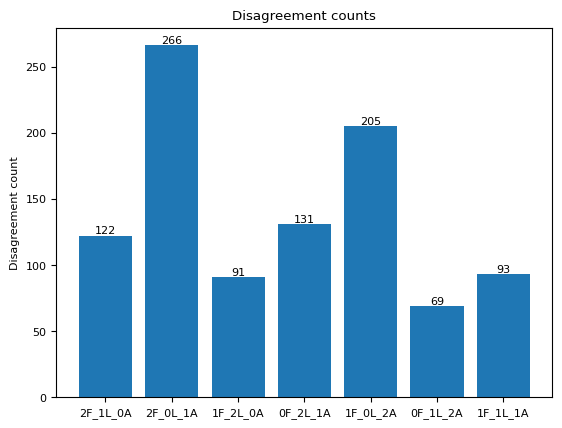

In [157]:
disagreement_types = [
    '2F_1L_0A', '2F_0L_1A', '1F_2L_0A', '0F_2L_1A', '1F_0L_2A', '0F_1L_2A', '1F_1L_1A']

fig, ax = plt.subplots()
disagreement_counts = []
for dt in disagreement_types:
    disagreement_counts.append(
        len(metabatch_disagree[metabatch_disagree['disagreement'] == dt])
    )

bars = ax.bar(disagreement_types, disagreement_counts)

ax.set_ylabel('Disagreement count')
ax.set_title('Disagreement counts')
ax.bar_label(bars)
plt.show()

In [163]:
metabatch_disagree[[
          "idiom","instance","label","meaning",
          "gold_0","gold_1","gold_2","review_maxVoteGptDiff","disagreement"
    ]].to_csv(f'batch_disagreement.csv', index=False)

In [169]:
metabatch[(metabatch['review_maxVoteGptDiff']) 
          & (metabatch['disagreement'] != '1F_1L_1A') 
          & (metabatch['gold_0'] != 3) 
          & (metabatch['gold_1'] != 3) 
          & (metabatch['gold_2'] != 3) ].to_csv('batch_GPT_maxVote.csv', index=False)